In [1]:
# values represent time in milliseconds obtained with: time python -c 'import tensorflow'
#
# test system:
# idle workernode of doduo Tier-2 cluster at HPC-UGent (node3511)
# RHEL 8.8, CernVM-FS 2.11.2, kernel 4.18.0-477.27.1.el8_8.x86_64
# 
# tests run after loading TensorFlow/2.13.0-foss-2023a module
#
# software stack was installed with EasyBuild 4.8.2
#
# FIXME: tests for CernVM-FS configurations run with TensorFlow/2.3.1-foss-2020a-Python-3.8.2 (from /cvmfs/pilot.eessi-hpc.org/versions/2021.12)
# should re-test with software stack in /cvmfs/software.eessi.io/versions/2023.06
# 
# tests run on Sun 19 Nov 2023 by Kenneth Hoste

In [2]:
dev_shm_cold_cache = [2.053, 2.033, 2.051, 2.048, 2.055]

In [3]:
tmp_cold_cache = [4.382, 4.408, 4.420, 4.412, 4.413]

In [4]:
lustre_vsc_tier1_hortense_cold_cache = [58.905, 60.873, 58.235, 60.102, 60.357]

In [5]:
cvmfs_cold_cache_proxy = [10.094, 10.095, 10.047, 10.066, 10.080]

In [6]:
cvmfs_cold_cache_no_proxy_rug_s1 = [33.96, 33.345, 33.459, 34.367, 33.148]

In [7]:
cvmfs_cold_cache_no_proxy_aws_eu_west = [82.238, 72.995, 80.901, 77.306, 73.663]

In [8]:
cvmfs_cold_cache_no_proxy_azure_us_east = [269.334, 255.101, 262.037, 262.932, 266.153]

In [9]:
cvmfs_warm_cache_proxy = [3.352, 3.815, 3.86, 3.847, 3.848]

In [10]:
cvmfs_warm_cache_no_proxy_rug_s1 = [3.795, 3.779, 3.795, 3.778, 3.782]

In [11]:
cvmfs_warm_cache_no_proxy_aws_eu_west = [4.238, 3.808, 3.802, 4.076, 3.819]

In [12]:
cvmfs_warm_cache_no_proxy_azure_us_east = [3.831, 3.782, 3.793, 3.997, 3.876]

In [13]:
dev_shm_hot_cache = [2.042, 2.039, 2.046, 2.030, 2.032]

In [14]:
tmp_hot_cache = [2.018, 2.013, 2.015, 2.013, 2.026]

In [15]:
lustre_vsc_tier1_hortense_hot_cache = [3.766, 3.125, 3.125, 3.179, 3.403]

In [16]:
cvmfs_hot_cache = [1.766, 1.756, 1.757, 1.753, 1.759]

In [17]:
from pandas import DataFrame
from seaborn import violinplot

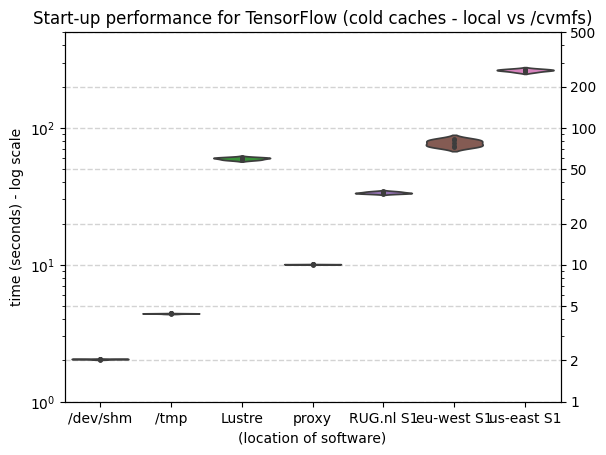

In [18]:
data_cold_cache = {
    "/dev/shm": dev_shm_cold_cache,
    "/tmp": tmp_cold_cache,
    "Lustre": lustre_vsc_tier1_hortense_cold_cache,
    "proxy": cvmfs_cold_cache_proxy,
    "RUG.nl S1": cvmfs_cold_cache_no_proxy_rug_s1,
    "eu-west S1": cvmfs_cold_cache_no_proxy_aws_eu_west,
    "us-east S1": cvmfs_cold_cache_no_proxy_azure_us_east,
}
plot = violinplot(data_cold_cache, inner="point", log_scale=True)
plot.set_title("Start-up performance for TensorFlow (cold caches - local vs /cvmfs)")
plot.set_xlabel("(location of software)")
plot.set_ylabel("time (seconds) - log scale")
y_values = [1, 2, 5, 10, 20, 50, 100, 200, 500]
plot.set_ylim((1, max(y_values)))
for y in y_values:
    plot.axhline(y=y, color='lightgray', linestyle='--', linewidth=1, zorder=0)
twinx = plot.twinx()
twinx.set_yscale('log')
twinx.set_yticks(y_values)
twinx.set_ylim((1, max(y_values)))
_ = twinx.set_yticklabels(y_values)

(0.0, 5.0)

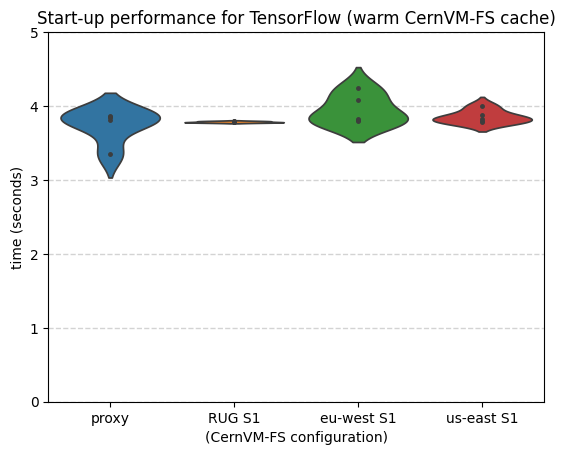

In [19]:
data_warm_cache = {
    "proxy": cvmfs_warm_cache_proxy,
    "RUG S1": cvmfs_warm_cache_no_proxy_rug_s1,
    "eu-west S1": cvmfs_warm_cache_no_proxy_aws_eu_west,
    "us-east S1":cvmfs_warm_cache_no_proxy_azure_us_east,
}
plot = violinplot(data_warm_cache, inner="point")
plot.set_title("Start-up performance for TensorFlow (warm CernVM-FS cache)")
plot.set_xlabel("(CernVM-FS configuration)")
plot.set_ylabel("time (seconds)")
y_values = [0,1,2,3,4,5]
plot.set_ylim((1, max(y_values)))
for y in y_values:
    plot.axhline(y=y, color='lightgray', linestyle='--', linewidth=1, zorder=0)
plot.set_ylim(0)

(0.0, 5.0)

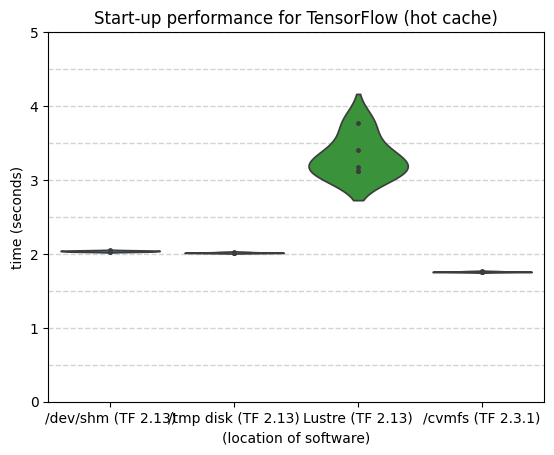

In [20]:
data_hot_cache = {
    "/dev/shm (TF 2.13)": dev_shm_hot_cache,
    "/tmp disk (TF 2.13)": tmp_hot_cache,
    "Lustre (TF 2.13)": lustre_vsc_tier1_hortense_hot_cache,
    "/cvmfs (TF 2.3.1)": cvmfs_hot_cache,
}
plot = violinplot(data_hot_cache, inner="point")
plot.set_title("Start-up performance for TensorFlow (hot cache)")
plot.set_xlabel("(location of software)")
plot.set_ylabel("time (seconds)")
y_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
plot.set_ylim((1, max(y_values)))
for y in y_values:
    plot.axhline(y=y, color='lightgray', linestyle='--', linewidth=1, zorder=0)
plot.set_ylim(0)

(0.0, 5.0)

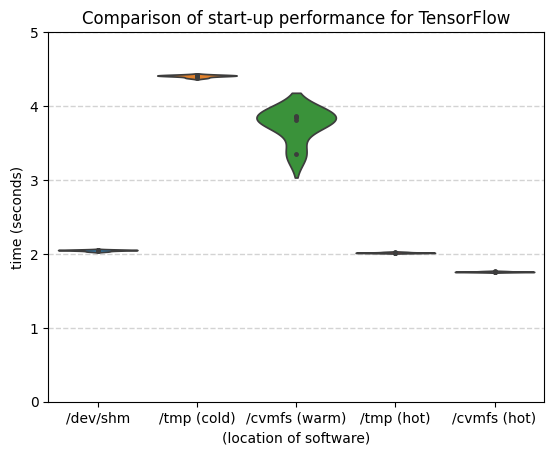

In [21]:
data_compare = {
    "/dev/shm": dev_shm_cold_cache,
    "/tmp (cold)": tmp_cold_cache,
    "/cvmfs (warm)": cvmfs_warm_cache_proxy,
    "/tmp (hot)": tmp_hot_cache,
    "/cvmfs (hot)": cvmfs_hot_cache,
}
plot = violinplot(data_compare, inner="point")
plot.set_title("Comparison of start-up performance for TensorFlow")
plot.set_xlabel("(location of software)")
plot.set_ylabel("time (seconds)")
y_values = [1, 2, 3, 4, 5]
plot.set_ylim((1, max(y_values)))
for y in y_values:
    plot.axhline(y=y, color='lightgray', linestyle='--', linewidth=1, zorder=0)
plot.set_ylim(0)